What I did in this notebook is to experiment with calculating snow depth from unwrap phase using one of the files in the MCS area. I used an assumed incidence angle of 45. This insight was used for all files in the snowDepth-Timeseries

In [74]:
##import packages

#Files/directory package
import os

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#spatial data and other packages
import geopandas as gpd
import rioxarray 
#import earthpy as et
import numpy as np
#import rasterio
#from rasterio.warp import calculate_default_transform, reproject, Resampling
import glob

In [75]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [76]:
#set path
print('working directory:', os.getcwd()) #print current working directory
#print(et.io.HOME) #print home directory

#set the absolute path for the data
data_path = '/SNOWDATA/Nah/lowman/tiffs/'
print('data directory:', data_path)

working directory: /home/naheemadebisi/snow-analytics/lowman
data directory: /SNOWDATA/Nah/lowman/tiffs/


In [77]:
#select all VV files of lowman_23205_21017-018_21019-018_0006d_s01_L090VV [03-10-21 : 03:16:21]

files = glob.glob(data_path + '*lowman_23205_21017-018_21019-018_0006d_s01_L090VV*')
files

['/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21017-018_21019-018_0006d_s01_L090VV_01.cor.grd.tiff',
 '/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21017-018_21019-018_0006d_s01_L090VV_01.hgt.grd.tiff',
 '/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21017-018_21019-018_0006d_s01_L090VV_01.int.grd.tiff',
 '/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21017-018_21019-018_0006d_s01_L090VV_01.unw.grd.tiff']

In [78]:
#open datasets as xarray. Use rioxarray for spatial support
coh_arr = rioxarray.open_rasterio(files[0]) #coherence
dem_arr = rioxarray.open_rasterio(files[1]) #dem
unw_arr = rioxarray.open_rasterio(files[3]) #unwrapped phase

In [79]:
#check the coordinate reference system
print('The crs of the coherence, dem, incidence angle, unwrapped phase is \n{} \n{} \n{} respectively'
        .format(coh_arr.rio.crs, dem_arr.rio.crs, unw_arr.rio.crs))

The crs of the coherence, dem, incidence angle, unwrapped phase is 
EPSG:4326 
EPSG:4326 
EPSG:4326 respectively


In [80]:
#Read the lidar data
lid_arr = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/Western-Snow-Conference/QSI_DEMs/MCS_15Mar21_snowdepth_diff.tif')

#check coordinate reference system
print('The crs of the lidar data is \n{}'.format(lid_arr.rio.crs))

The crs of the lidar data is 
PROJCS["unnamed",GEOGCS["Unknown datum based upon the GRS 1980 ellipsoid",DATUM["Not_specified_based_on_GRS_1980_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6019"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4019"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


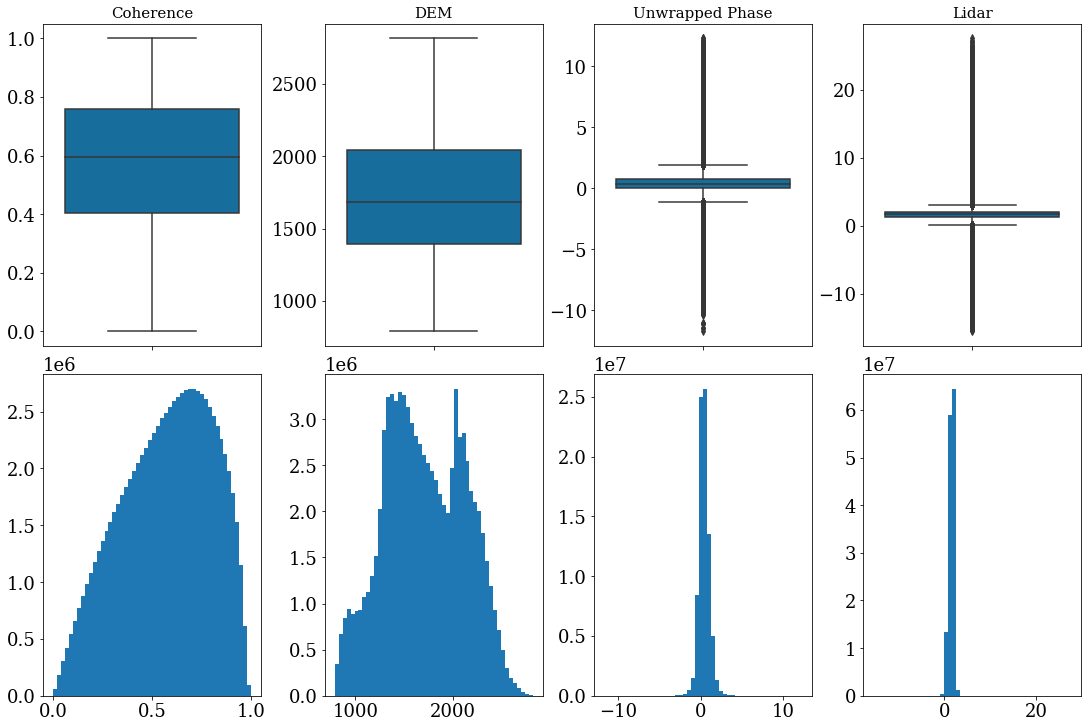

In [81]:
fig, axs = plt.subplots(2,4, figsize = (15,10), constrained_layout = True) 
(ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = axs.flatten()

sns.boxplot(y= coh_arr, ax=ax0, palette= 'colorblind')
sns.boxplot(y= dem_arr, ax=ax1, palette= 'colorblind')
sns.boxplot(y= unw_arr, ax=ax2, palette= 'colorblind')
sns.boxplot(y= lid_arr, ax=ax3, palette= 'colorblind')

coh_arr.plot.hist(ax=ax4, bins = 50)
ax4.set_title('')
dem_arr.plot.hist(ax=ax5, bins = 50)
ax5.set_title('')
unw_arr.plot.hist(ax=ax6, bins = 50)
ax6.set_title('')
lid_arr.plot.hist(ax=ax7, bins = 50)
ax7.set_title('')

#Set title of the plots
ax0.set_title('Coherence', fontsize = 15)
ax1.set_title('DEM', fontsize = 15)
ax2.set_title('Unwrapped Phase', fontsize = 15)
ax3.set_title('Lidar', fontsize = 15)

plt.show()




The unwrapped phase and lidar seems to have some outlier. Let's remove them.

In [82]:
# Remove Outlier: Select only data values within 0.95 and 0.05 of the upper whisker
unw_arr_whisker = unw_arr.where(((unw_arr < float(unw_arr.quantile(0.95).values)) & (unw_arr > float(unw_arr.quantile(0.05).values))), other = np.nan)
lid_arr_whisker = lid_arr.where(((lid_arr < float(lid_arr.quantile(0.95).values)) & (lid_arr > float(lid_arr.quantile(0.05).values))), other = np.nan)

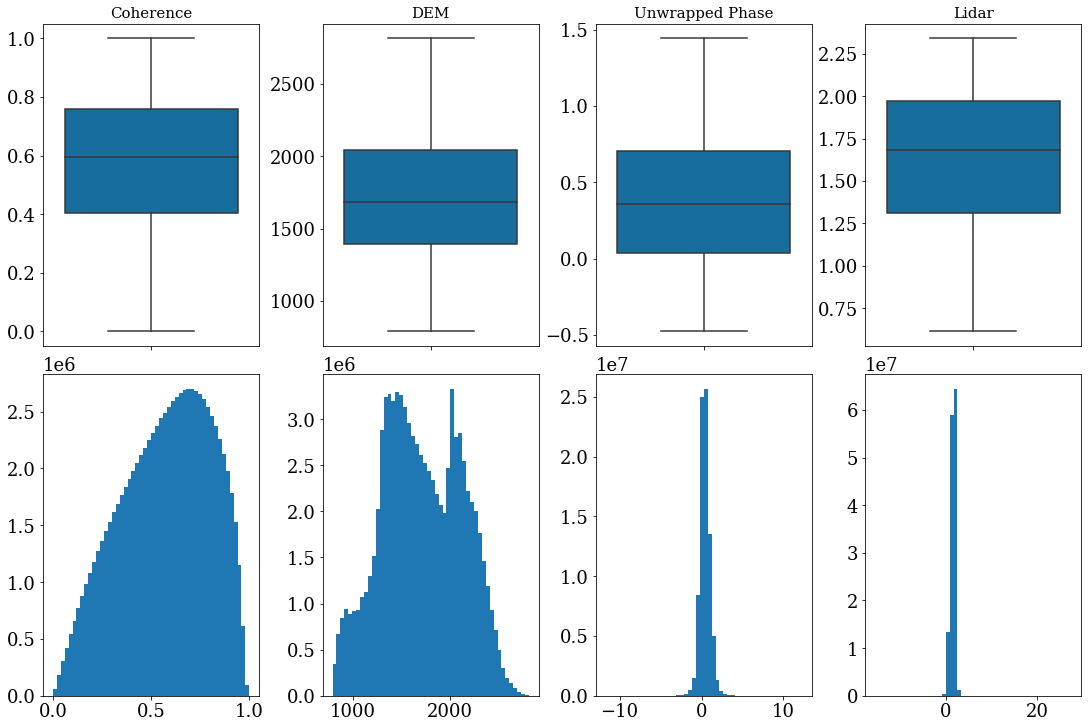

In [83]:
fig, axs = plt.subplots(2,4, figsize = (15,10), constrained_layout = True) 
(ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = axs.flatten()

sns.boxplot(y= coh_arr, ax=ax0, palette= 'colorblind')
sns.boxplot(y= dem_arr, ax=ax1, palette= 'colorblind')
sns.boxplot(y= unw_arr_whisker, ax=ax2, palette= 'colorblind')
sns.boxplot(y= lid_arr_whisker, ax=ax3, palette= 'colorblind')

coh_arr.plot.hist(ax=ax4, bins = 50)
ax4.set_title('')
dem_arr.plot.hist(ax=ax5, bins = 50)
ax5.set_title('')
unw_arr.plot.hist(ax=ax6, bins = 50)
ax6.set_title('')
lid_arr.plot.hist(ax=ax7, bins = 50)
ax7.set_title('')

#Set title of the plots
ax0.set_title('Coherence', fontsize = 15)
ax1.set_title('DEM', fontsize = 15)
ax2.set_title('Unwrapped Phase', fontsize = 15)
ax3.set_title('Lidar', fontsize = 15)

plt.show()

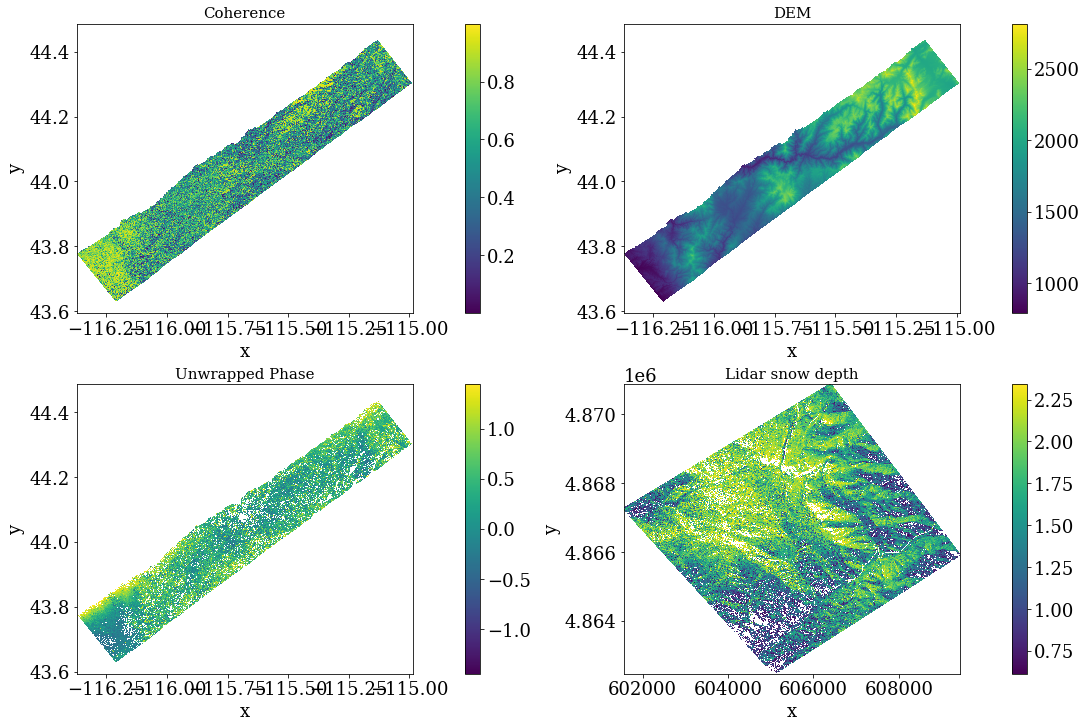

In [85]:
#Plot the raster data
fig, axs = plt.subplots(2,2, figsize = (15,10), constrained_layout = True)
(ax0, ax1, ax2, ax3) = axs.flatten()

coh_arr.plot(ax=ax0, cmap = 'viridis')
ax0.set_title('Coherence', fontsize = 15)
dem_arr.plot(ax=ax1, cmap = 'viridis')
ax1.set_title('DEM', fontsize = 15)
unw_arr_whisker.plot(ax=ax2, cmap = 'viridis')
ax2.set_title('Unwrapped Phase', fontsize = 15)
lid_arr_whisker.plot(ax=ax3, cmap = 'viridis')
ax3.set_title('Lidar snow depth', fontsize = 15)

plt.show()



Use incidence angle of 45 deg. That is 0.25rad

In [86]:
#calculate the snow depth based on Guinerrisen 2001 formula

snowdepth_cm = (-1 * unw_arr_whisker * 24.0)/(4 * np.pi * (np.cos(0.25)  - np.sqrt(1.5 - (np.sin(0.25)**2))))

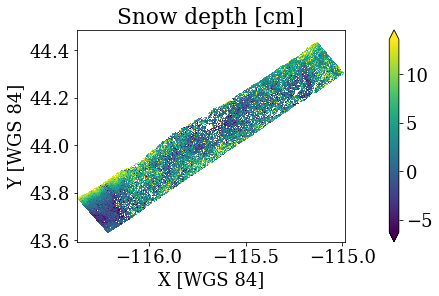

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), constrained_layout = True)

snowdepth_cm.plot(ax =ax, cmap = 'viridis',
                 vmin = np.nanpercentile(snowdepth_cm, 1),
                 vmax = np.nanpercentile(snowdepth_cm, 99))
ax.set(title = 'Change in snow depth [cm] between 15 and 21 Mar 2021',
      xlabel = 'X [WGS 84]',
      ylabel = 'Y [WGS 84]')


plt.show()

In [ ]:
# #save xarray to tif file
# snowdepth_cm.rio.to_raster('/home/naheemadebisi/snow-analytics/lowman/MCS_15_21Mar2021_snow_diff.tif')

In [87]:
snowdepth_cm

<xarray.DataArray (band: 1, y: 16051, x: 24948)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -116.4 -116.4 -116.4 ... -115.0 -115.0 -115.0
  * y            (y) float64 44.49 44.49 44.49 44.49 ... 43.59 43.59 43.59 43.59
    spatial_ref  int64 0

In [88]:
# Snow depth at the point of interest. MCS Snotel site [lat, lon] = [43.9333, -115.667]
snowdepth_cm.sel(x = -115.667, y = 43.9333, method = 'nearest')


<xarray.DataArray (band: 1)>
array([9.208427], dtype=float32)
Coordinates:
  * band         (band) int64 1
    x            float64 -115.7
    y            float64 43.93
    spatial_ref  int64 0